<a href="https://colab.research.google.com/github/liliayata/liliayata/blob/main/TitanicPassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
train_tp = pd.read_csv("titanic-passengers.csv") #load data
test_tp = pd.read_csv("titanic-passengers.csv")



#importing data

In [ ]:
titanic_p=pd.read_csv("titanic-passengers.csv", sep=";")
titanic_p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [ ]:
titanic_p.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#showing the head of the dataset

In [ ]:
titanic_p.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


#general info

In [ ]:
titanic_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


#find missing information

In [ ]:
print(titanic_p.isnull())

     PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False   True     False
4          False     False   False  False  ...   False  False  False     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False   True     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False   True     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 columns]


In [ ]:
print(titanic_p.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#replace missing informations


In [ ]:
titanic_p['Age'].fillna(value=titanic_p['Age'].mean(), inplace=True) #replace the NaN in the column age by the mean
titanic_p.drop('Cabin',axis=1,inplace= True)                         #drop the colmn cabin which contains a lot of NaN
titanic_p['Embarked'].fillna(method='ffill', inplace=True)           #Fill NAN with last valid value



##presence of NaN with a heatmap


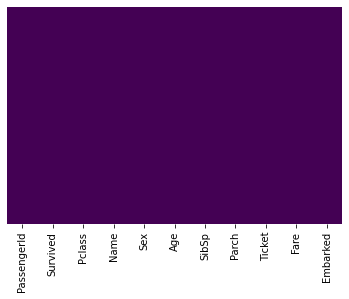

In [ ]:
sns.heatmap(titanic_p.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

#DATA VISUALIZATION
##Studying the distribution of the most important features

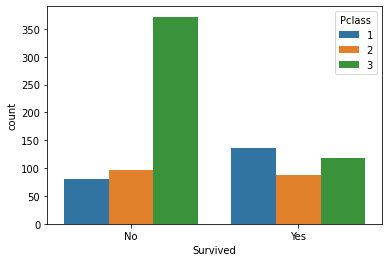

In [ ]:
sns.countplot(x = 'Survived',data=titanic_p,hue='Pclass')  # first class passengers are more likely to survive

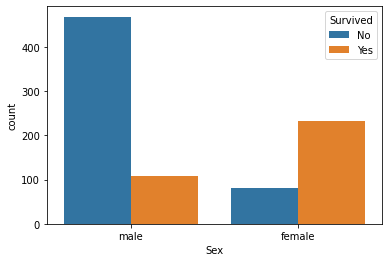

In [ ]:
sns.countplot(x = 'Sex',data=titanic_p,hue='Survived')  #the number of women who have survived is higher than men

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


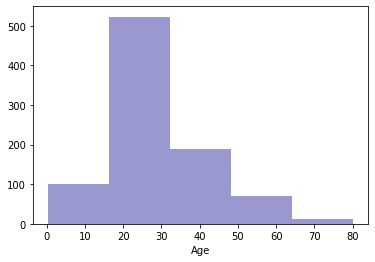

In [ ]:
sns.distplot(titanic_p['Age'].dropna(),kde = False, bins=5 ,color = 'darkblue') #the number of people who are around 20-30 years old is high 

Correlating multiple numerical and categorical features


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


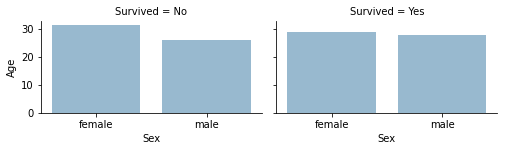

In [ ]:
grid = sns.FacetGrid(titanic_p, col="Survived", size=2.2, aspect=1.6)     #we have more women than men who survived
grid.map(sns.barplot, "Sex", 'Age', alpha=.5, ci=None)                    #the survivors were around 30 years old
grid.add_legend()


#correlation heatmap

In [ ]:
def plot_correlation_map(df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

    


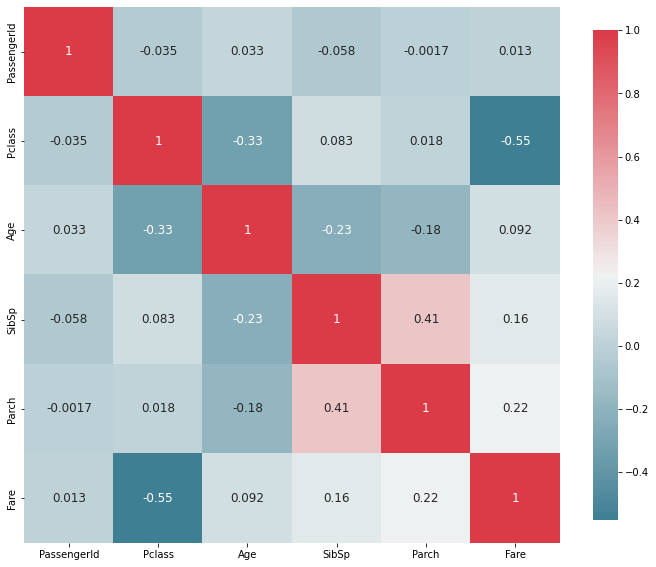

In [ ]:
plot_correlation_map(titanic_p)

#Groupby


In [ ]:
titanic_p['Pclass'] = pd.Categorical(titanic_p.Pclass) #change the type of the column Pclass from int to category
titanic_p.dtypes


PassengerId       int64
Survived         object
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

In [ ]:
tp_g = titanic_p.groupby(['Pclass','Survived']).mean() #the relation between Pclass and Survived
tp_g                               

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  40.896074  0.287500  0.300000  64.684008
       Yes        491.772059  34.784615  0.492647  0.389706  95.608029
2      No         452.123711  33.266947  0.319588  0.144330  19.412328
       Yes        439.080460  26.076166  0.494253  0.643678  22.055700
3      No         453.580645  27.417500  0.672043  0.384409  13.669364
       Yes        394.058824  23.232689  0.436975  0.420168  13.694887

#drop the useless columns

In [ ]:
titanic_p.drop(['PassengerId','Ticket','Embarked'],axis=1,inplace= True)


In [ ]:
name=titanic_p['Name']
name

0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
886                  Nasser, Mrs. Nicholas (Adele Achem)
887                                Sirayanian, Mr. Orsen
888                                  Cacic, Miss. Marija
889                     Petroff, Mr. Pastcho ("Pentcho")
890    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 891, dtype: object

In [ ]:
titanic_p.drop(['Name'],axis=1,inplace= True)

#Title

In [ ]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [ ]:
titanic_p['Title'] = name.apply(get_title)


In [ ]:
titanic_p

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,No,2,male,28.000000,0,0,13.0000,Mr
1,No,3,male,25.000000,0,0,7.6500,Mr
2,No,3,male,20.000000,0,0,7.8542,Mr
3,No,3,female,29.000000,0,4,21.0750,Mrs
4,No,1,male,31.000000,1,0,52.0000,Mr
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,Mrs
887,No,3,male,22.000000,0,0,7.2292,Mr
888,No,3,female,30.000000,0,0,8.6625,Miss
889,No,3,male,29.699118,0,0,7.8958,Mr


#Visualize the correlation

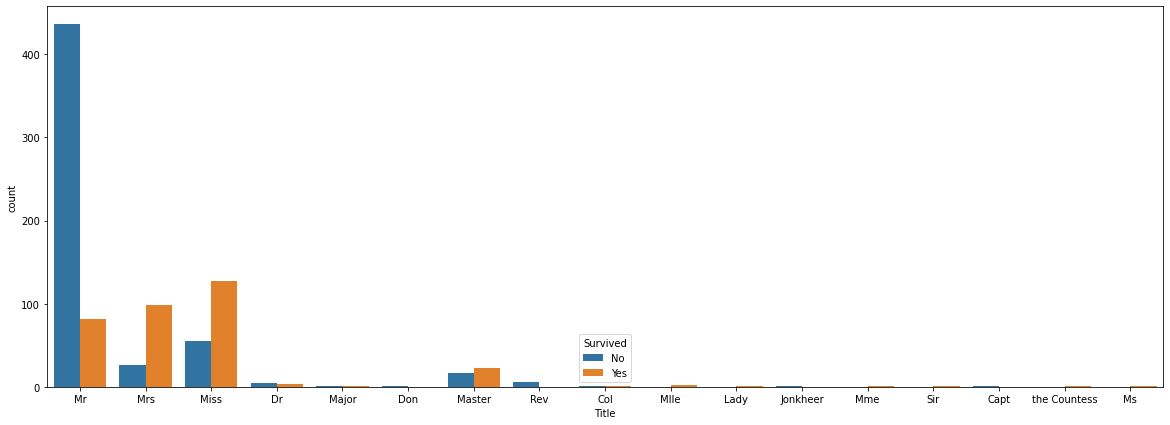

In [ ]:
# define the figure and plot; modify the countplot figure size
countplt, ax = plt.subplots(figsize = (20,7))
ax =sns.countplot(x = 'Title',data=titanic_p,hue='Survived')
         

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


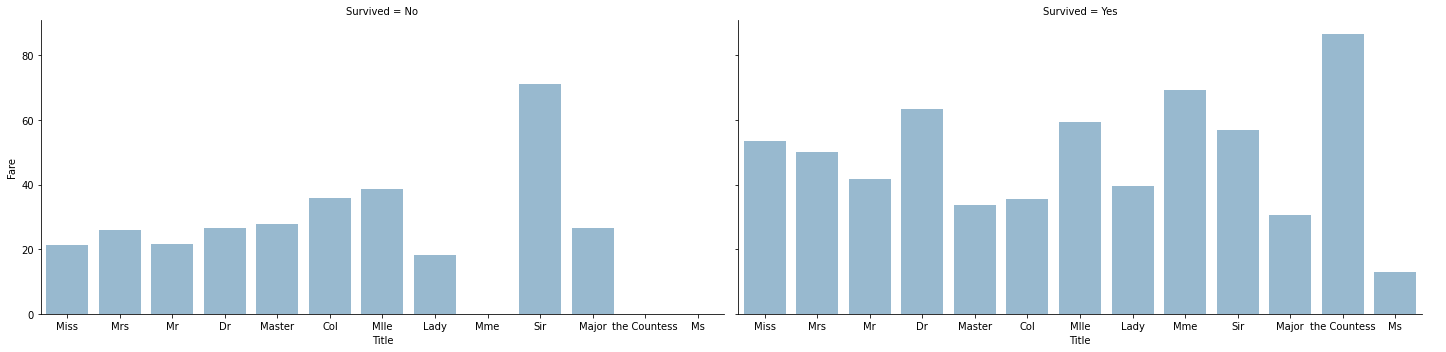

In [ ]:
grid = sns.FacetGrid(titanic_p, col="Survived", size=5, aspect=2)   #The higher a tourist paid, the higher would be his chances to survive.
grid.map(sns.barplot, "Title", 'Fare', alpha=.5, ci=None)                    
grid.add_legend()

In [ ]:
titanic_p['Fare'] = pd.Categorical(titanic_p.Fare) #change the type of the column Pclass from int to category
titanic_p.dtypes

Survived      object
Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare        category
Title         object
dtype: object

In [ ]:
title_g= titanic_p.groupby(['Title','Fare']).mean() #the relation between Pclass and survived
title_g                                #we have the men of the people who survived and those who didn't in each class 

Age  SibSp  Parch
Title        Fare                       
Capt         0.0       NaN    NaN    NaN
             4.0125    NaN    NaN    NaN
             5.0       NaN    NaN    NaN
             6.2375    NaN    NaN    NaN
             6.4375    NaN    NaN    NaN
...                    ...    ...    ...
the Countess 227.525   NaN    NaN    NaN
             247.5208  NaN    NaN    NaN
             262.375   NaN    NaN    NaN
             263.0     NaN    NaN    NaN
             512.3292  NaN    NaN    NaN

[4216 rows x 3 columns]

#Dictionary


In [ ]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
def get_titles():
    # we extract the title from each name
    titanic_p['Title'] = name.map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    titanic_p['Title'] = titanic_p.Title.map(Title_Dictionary)
    status('Title')
    return titanic_p



In [ ]:
def process_family():
    
    global titanic_p
    # introducing a new feature : the size of families (including the passenger)
    titanic_p['FamilySize'] = titanic_p['Parch'] + titanic_p['SibSp'] + 1
    
    # introducing other features based on the family size
    titanic_p['Singleton'] = titanic_p['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    titanic_p['SmallFamily'] = titanic_p['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    titanic_p['LargeFamily'] = titanic_p['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return titanic_p

In [ ]:
titanic_p.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,No,2,male,28.0,0,0,13.0000,Mr
1,No,3,male,25.0,0,0,7.6500,Mr
2,No,3,male,20.0,0,0,7.8542,Mr
3,No,3,female,29.0,0,4,21.0750,Mrs
4,No,1,male,31.0,1,0,52.0000,Mr
